In [1]:
from keras.applications import VGG16
conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(150, 150, 3))

58892288/58889256 [==============================] - 6s 0us/step


In [2]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [3]:
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

In [5]:
train_dir='C:/Users/jithi/Desktop/dogs-vs-cats/train'
valid_dir='C:/Users/jithi/Desktop/dogs-vs-cats/valid'
test_dir='C:/Users/jithi/Desktop/dogs-vs-cats/test'

In [6]:
datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20

In [7]:
def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 4, 4, 512))
    labels = np.zeros(shape=(sample_count))
    generator = datagen.flow_from_directory(
    directory,
    target_size=(150, 150),
    batch_size=batch_size,
    class_mode='binary')
    i=0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            break
    return features, labels

In [11]:
train_features, train_labels = extract_features(train_dir, 1000)
validation_features, validation_labels = extract_features(valid_dir, 200)
test_features, test_labels = extract_features(test_dir, 100)

Found 1000 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


In [12]:
train_features = np.reshape(train_features, (1000, 4*4* 512))
validation_features = np.reshape(validation_features, (200, 4*4* 512))
test_features = np.reshape(test_features, (100, 4*4* 512))

In [14]:
train_features.shape

(1000, 8192)

In [17]:
np.zeros(1,2))

array([[0., 0.]])

In [18]:
from keras import models
from keras import layers
from keras import optimizers
model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim=4 * 4 * 512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer=optimizers.RMSprop(lr=2e-5),
loss='binary_crossentropy',
metrics=['acc'])
history = model.fit(train_features, train_labels,
epochs=30,
batch_size=20,
validation_data=(validation_features, validation_labels))


Epoch 1/30
50/50 [==============================] - 2s 33ms/step - loss: 0.6591 - acc: 0.6000 - val_loss: 0.5274 - val_acc: 0.7950
Epoch 2/30
50/50 [==============================] - 2s 31ms/step - loss: 0.5263 - acc: 0.7180 - val_loss: 0.4370 - val_acc: 0.8550
Epoch 3/30
50/50 [==============================] - 2s 31ms/step - loss: 0.4285 - acc: 0.8070 - val_loss: 0.3783 - val_acc: 0.8800
Epoch 4/30
50/50 [==============================] - 2s 31ms/step - loss: 0.3785 - acc: 0.8440 - val_loss: 0.3439 - val_acc: 0.8900
Epoch 5/30
50/50 [==============================] - 2s 31ms/step - loss: 0.3529 - acc: 0.8590 - val_loss: 0.3167 - val_acc: 0.9000
Epoch 6/30
50/50 [==============================] - 2s 30ms/step - loss: 0.3195 - acc: 0.8750 - val_loss: 0.3029 - val_acc: 0.9000
Epoch 7/30
50/50 [==============================] - 2s 32ms/step - loss: 0.2970 - acc: 0.8830 - val_loss: 0.2878 - val_acc: 0.9000
Epoch 8/30
50/50 [==============================] - 2s 35ms/step - loss: 0.2815 - a

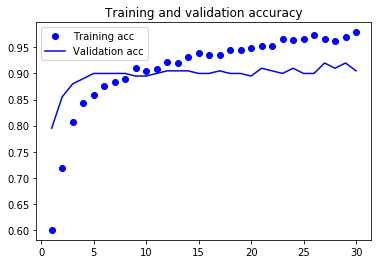

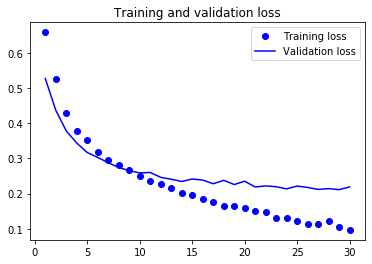

In [21]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()